In [56]:
import pandas as pd
import numpy as np

# https://helda.helsinki.fi/dhanken/bitstream/handle/10227/509800/Lehtinen_Tuomas.pdf?sequence=1

In [57]:
# Get SPY and VIX data from the past year with daily frequency

df_spy = pd.read_csv("SPY.csv")
df_vix = pd.read_csv("VIX.csv")

In [58]:
# Rename columns to distinguish SPY and VIX before merging data

columns = ["Open","High","Low","Close","Adj","Close","Volume"]
for col in columns:
    df_spy.rename(columns = {col: col + "_spy"}, inplace = True)
    df_vix.rename(columns = {col: col + "_vix"}, inplace = True)

In [59]:
# Merge both dataframes based on Date
merged_df = pd.merge(left = df_spy, right = df_vix, on = "Date")

In [60]:
merged_df.head()

,Date,Open_spy,High_spy,Low_spy,Close_spy,Adj Close_x,Volume_spy,Open_vix,High_vix,Low_vix,Close_vix,Adj Close_y,Volume_vix
0,2007-12-05,147.929993,149.199997,147.830002,148.809998,110.771469,171130000,22.719999,23.030001,21.870001,22.530001,22.530001,0
1,2007-12-06,148.630005,151.210007,148.570007,150.940002,112.356964,154457400,22.680000,22.750000,20.870001,20.959999,20.959999,0
2,2007-12-07,151.419998,151.500000,150.550003,150.910004,112.334686,148980100,20.690001,21.010000,20.290001,20.850000,20.850000,0
3,2007-12-10,151.279999,152.250000,150.860001,152.080002,113.205551,123914300,21.160000,21.459999,20.360001,20.740000,20.740000,0
4,2007-12-11,152.139999,152.889999,147.830002,147.910004,110.101494,250346400,20.690001,23.700001,19.770000,23.590000,23.590000,0


In [61]:
# Close* vs Adj Close**	?

# 1) modify the time-series of daily closing prices to a more suitable form: r_t = [p_t - p_(t-1)] / p_(t-1)
# where p is the closing price and r is the numerical value of percentage return on date t.

spy_returns = merged_df["Close_spy"]
vix_returns = merged_df["Close_vix"]

# np.diff takes the difference between consequtive values (p_t - p_(t-1))
spy_diff_returns = np.diff(spy_returns) / spy_returns[:-1]
vix_diff_returns = np.diff(vix_returns) / vix_returns[:-1]

In [62]:
# Append 0 to spy_diff_returns and vix_diff_returns since no data for the last day 2021-12-06
spy_percent_returns = np.append(0, spy_diff_returns)
vix_percent_returns = np.append(0, vix_diff_returns)

print(merged_df.shape[0], len(spy_percent_returns), len(vix_percent_returns))

3776 3776 3776


In [63]:
# Add percent_returns back to merged dataframe

merged_df["spy_returns"] = spy_percent_returns
merged_df["vix_returns"] = vix_percent_returns

merged_df.head()

,Date,Open_spy,High_spy,Low_spy,Close_spy,Adj Close_x,Volume_spy,Open_vix,High_vix,Low_vix,Close_vix,Adj Close_y,Volume_vix,spy_returns,vix_returns
0,2007-12-05,147.929993,149.199997,147.830002,148.809998,110.771469,171130000,22.719999,23.030001,21.870001,22.530001,22.530001,0,0.000000,0.000000
1,2007-12-06,148.630005,151.210007,148.570007,150.940002,112.356964,154457400,22.680000,22.750000,20.870001,20.959999,20.959999,0,0.014314,-0.069685
2,2007-12-07,151.419998,151.500000,150.550003,150.910004,112.334686,148980100,20.690001,21.010000,20.290001,20.850000,20.850000,0,-0.000199,-0.005248
3,2007-12-10,151.279999,152.250000,150.860001,152.080002,113.205551,123914300,21.160000,21.459999,20.360001,20.740000,20.740000,0,0.007753,-0.005276
4,2007-12-11,152.139999,152.889999,147.830002,147.910004,110.101494,250346400,20.690001,23.700001,19.770000,23.590000,23.590000,0,-0.027420,0.137416


In [64]:
# looking for a day or two consecutive days with positive co-movement in the VIX and the S&P 500 (SPX)

positive_spy_returns = spy_percent_returns > 0
positive_vix_returns = vix_percent_returns > 0

negative_spy_returns = spy_percent_returns < 0
negative_vix_returns = vix_percent_returns < 0

 

# For one day positive co-movement
positive_returns = np.logical_and(positive_spy_returns, positive_vix_returns)
negative_returns = np.logical_and(negative_spy_returns, negative_vix_returns)

# For two day positive co-movement
positive_two_day_returns = [False]                  
for i in range(1, len(positive_returns)):          
    if positive_returns[i] == True and positive_returns[i-1] == True:
        positive_two_day_returns.append(True)
    else:
        positive_two_day_returns.append(False)

# For two day negative co-movement
negative_two_day_returns = [False]                  
for i in range(1, len(negative_returns)):          
    if negative_returns[i] == True and negative_returns[i-1] == True:
        negative_two_day_returns.append(True)
    else:
        negative_two_day_returns.append(False)


print(len(positive_returns), len(positive_two_day_returns))

3776 3776


In [65]:
merged_df["one_day_signal_positive"] = positive_returns
merged_df["two_day_signal_positive"] = positive_two_day_returns
merged_df["one_day_signal_negative"] = negative_returns
merged_df["two_day_signal_negative"] = negative_two_day_returns
merged_df["one_day_signal_either"] = np.logical_or(positive_returns, negative_returns)

In [66]:
merged_df.head()

,Date,Open_spy,High_spy,Low_spy,Close_spy,Adj Close_x,Volume_spy,Open_vix,High_vix,Low_vix,Close_vix,Adj Close_y,Volume_vix,spy_returns,vix_returns,one_day_signal_positive,two_day_signal_positive,one_day_signal_negative,two_day_signal_negative,one_day_signal_either
0,2007-12-05,147.929993,149.199997,147.830002,148.809998,110.771469,171130000,22.719999,23.030001,21.870001,22.530001,22.530001,0,0.000000,0.000000,False,False,False,False,False
1,2007-12-06,148.630005,151.210007,148.570007,150.940002,112.356964,154457400,22.680000,22.750000,20.870001,20.959999,20.959999,0,0.014314,-0.069685,False,False,False,False,False
2,2007-12-07,151.419998,151.500000,150.550003,150.910004,112.334686,148980100,20.690001,21.010000,20.290001,20.850000,20.850000,0,-0.000199,-0.005248,False,False,True,False,True
3,2007-12-10,151.279999,152.250000,150.860001,152.080002,113.205551,123914300,21.160000,21.459999,20.360001,20.740000,20.740000,0,0.007753,-0.005276,False,False,False,False,False
4,2007-12-11,152.139999,152.889999,147.830002,147.910004,110.101494,250346400,20.690001,23.700001,19.770000,23.590000,23.590000,0,-0.027420,0.137416,False,False,False,False,False


In [67]:
display(merged_df)

,Date,Open_spy,High_spy,Low_spy,Close_spy,Adj Close_x,Volume_spy,Open_vix,High_vix,Low_vix,Close_vix,Adj Close_y,Volume_vix,spy_returns,vix_returns,one_day_signal_positive,two_day_signal_positive,one_day_signal_negative,two_day_signal_negative,one_day_signal_either
0,2007-12-05,147.929993,149.199997,147.830002,148.809998,110.771469,171130000,22.719999,23.030001,21.870001,22.530001,22.530001,0,0.000000,0.000000,False,False,False,False,False
1,2007-12-06,148.630005,151.210007,148.570007,150.940002,112.356964,154457400,22.680000,22.750000,20.870001,20.959999,20.959999,0,0.014314,-0.069685,False,False,False,False,False
2,2007-12-07,151.419998,151.500000,150.550003,150.910004,112.334686,148980100,20.690001,21.010000,20.290001,20.850000,20.850000,0,-0.000199,-0.005248,False,False,True,False,True
3,2007-12-10,151.279999,152.250000,150.860001,152.080002,113.205551,123914300,21.160000,21.459999,20.360001,20.740000,20.740000,0,0.007753,-0.005276,False,False,False,False,False
4,2007-12-11,152.139999,152.889999,147.830002,147.910004,110.101494,250346400,20.690001,23.700001,19.770000,23.590000,23.590000,0,-0.027420,0.137416,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,2022-11-28,399.089996,400.809998,395.109985,395.910004,395.910004,67881600,22.090000,22.500000,21.650000,22.209999,22.209999,0,-0.015957,0.083415,False,False,False,False,False
3772,2022-11-29,396.049988,397.299988,393.299988,395.230011,395.230011,52310000,22.090000,22.570000,21.830000,21.889999,21.889999,0,-0.001718,-0.014408,False,False,True,False,True
3773,2022-11-30,395.489990,407.679993,393.480011,407.679993,407.679993,144566700,21.700001,22.629999,20.309999,20.580000,20.580000,0,0.031501,-0.059845,False,False,False,False,False
3774,2022-12-01,408.769989,410.000000,404.750000,407.380005,407.380005,76398200,20.830000,21.059999,19.799999,19.840000,19.840000,0,-0.000736,-0.035957,False,False,True,False,True


In [68]:
# Trade should occur at the closing price on the day the two day positive signal is true
SPY_change_if_signal_positive = []
percent_change_positive = []
for i in range(len(positive_returns)-1):
  if(positive_two_day_returns[i-1]):
    SPY_change_if_signal_positive.append(merged_df.at[i-1,"Close_spy"] - merged_df.at[i, "Low_spy"])
    percent_change_positive.append(1/(merged_df.at[i, "Low_spy"]/merged_df.at[i-1,"Close_spy"]))
                                   

print(sum(SPY_change_if_signal_positive) / len(SPY_change_if_signal_positive))



0.9619607450980382


In [69]:
SPY_change_if_signal_negative = []
percent_change_negative = []
for i in range(1,len(positive_returns)):
  if(negative_two_day_returns[i-1]):
    c = merged_df.at[i-1,"Close_spy"] - merged_df.at[i, "High_spy"]
    SPY_change_if_signal_negative.append(c)
    percent_change_negative.append(merged_df.at[i, "High_spy"]/merged_df.at[i-1,"Close_spy"])

print(sum(SPY_change_if_signal_negative) / len(SPY_change_if_signal_negative))


-2.16264617647059


In [70]:
# Simulating an account making trades on the positive signal

account_value_p = [100000]

for i in range(len(percent_change_positive)):
  account_value_p.append(account_value_p[i] * percent_change_positive[i])


print("Total trades: " + str(len(percent_change_positive)))
account_value_p[len(percent_change_positive)]

Total trades: 51


127916.94481357919

In [71]:
# Simulating an account making trades on the negative signal

account_value_n = [100000]

for i in range(len(percent_change_negative)):
  account_value_n.append(account_value_n[i] * percent_change_negative[i])


print("Total trades: " + str(len(percent_change_negative)))
account_value_n[len(percent_change_negative)]

Total trades: 34


140054.87176586542

Text(0.5, 1.0, 'Simulated account on positive signal')

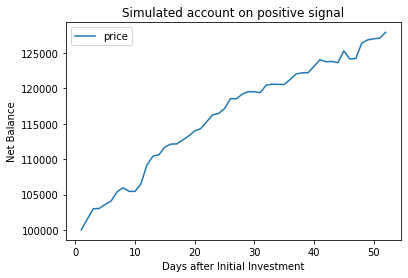

In [80]:
df = pd.DataFrame({
   'price': account_value_p
   }, index=[i for i in range(1,len(account_value_p)+1)])

lines = df.plot.line()
lines.set_xlabel("Days after Initial Investment")
lines.set_ylabel("Net Balance")
lines.set_title("Simulated account on positive signal")

Text(0.5, 1.0, 'Simulated account on negative signal')

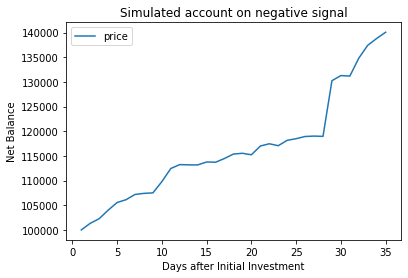

In [79]:
df = pd.DataFrame({
   'price': account_value_n
   }, index=[i for i in range(1,len(account_value_n)+1)])
lines = df.plot.line()
lines.set_xlabel("Days after Initial Investment")
lines.set_ylabel("Net Balance")
lines.set_title("Simulated account on negative signal")